Demonstrate how the functions in resonanceFitter.py work

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sys
sys.path.append('../soft/')

from resonanceFitter import *

In [2]:
q = 789892.56
f0 = 5.6930312E6 # frequency in kHz
#f0 = 5.0E6 # frequency in kHz
a = 3.6921007
v = 1738.3526
c = 4849.9218
theta = 0.43856595
gi = 1202.1240
gq = 1280.4136
ic = 7164.7115
qc = 11181.436

params = q,f0,a,v,c,theta,gi,gq,ic,qc
df = 20.0
npt = 30
freqs = np.linspace(f0-1.1*df, f0+0.9*df, npt) # Frequencies do not have to be centered on the peak
temp = mazinResonance(freqs, q, f0, a, v, c, theta, gi, gq, ic, qc)
print(temp.shape)
print(type(temp[0]))
iqs = temp.reshape((2,-1))[0] + 1j*temp.reshape((2,-1))[1]
ia = iqs.real
qa = iqs.imag
 

(60,)
<class 'numpy.float64'>


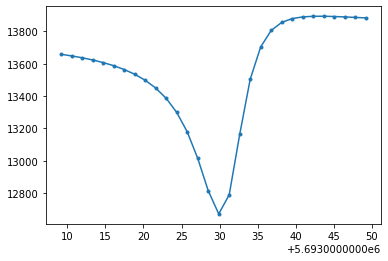

In [3]:
plt.plot(freqs,np.abs(iqs),'.-')

In [4]:
np.random.seed(123455)
scale = 25
iqsMeas = iqs + (np.random.normal(0, scale, npt) + 1j*np.random.normal(0, scale, npt))
iqsMeasF = np.array([np.real(iqsMeas), np.imag(iqsMeas)]).reshape((-1))

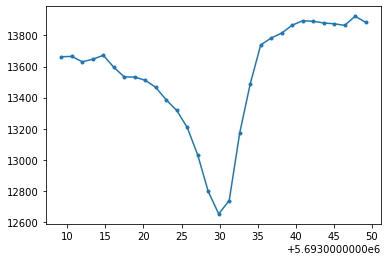

In [5]:
plt.plot(freqs,np.abs(iqsMeas),'.-')

In [6]:
rv = fitResonance(freqs, iqsMeas)

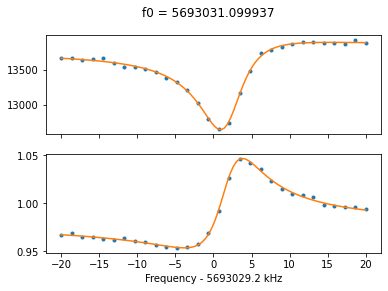

In [7]:
p = rv[0]
fitResonancePlot(freqs, iqsMeas, p, 0)

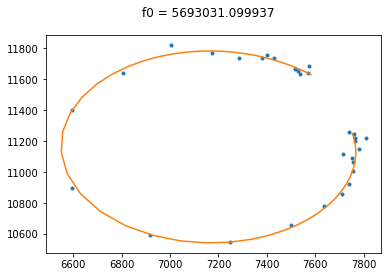

In [8]:
fitResonancePlot(freqs, iqsMeas, p, 1)